# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [2]:
! cd /opt && git clone https://github.com/cocodataset/cocoapi.git  
! cd /opt/cocoapi/PythonAPI && make
! cd /opt/cocoapi && wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
! cd /opt/cocoapi && wget http://images.cocodataset.org/annotations/image_info_test2014.zip

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 0 bytes/s, done.
Resolving deltas: 100% (576/576), done.
Checking connectivity... done.
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/opt/conda/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /opt/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/opt/conda/lib/python3.6/site-packages/numpy/core/include -I../common

In [3]:
! mkdir /opt/cocoapi/images 
! cd /opt/cocoapi/images && wget http://images.cocodataset.org/zips/train2014.zip
! cd /opt/cocoapi/images && wget http://images.cocodataset.org/zips/val2014.zip
! cd /opt/cocoapi/images && wget http://images.cocodataset.org/zips/test2014.zip

--2022-08-24 17:04:34--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.199.9
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.199.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  71.6MB/s    in 3m 31s  

2022-08-24 17:08:05 (61.2 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]

--2022-08-24 17:08:06--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.225.233
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.225.233|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  61.5MB/s    in 1m 42s  

2022-08-24 17:09:48 (62.2 MB/s) - ‘

In [4]:
! cd /opt/cocoapi/images && unzip -q test2014.zip

In [5]:
! cd /opt/cocoapi/images && unzip -q val2014.zip

In [6]:
! cd /opt/cocoapi/images && unzip -q train2014.zip

In [7]:
! cd /opt/cocoapi && unzip -q annotations_trainval2014.zip

In [8]:
! cd /opt/cocoapi && unzip -q image_info_test2014.zip

In [9]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/opt/cocoapi'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=6.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.42s)
creating index...
index created!


## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

http://images.cocodataset.org/val2014/COCO_val2014_000000422700.jpg


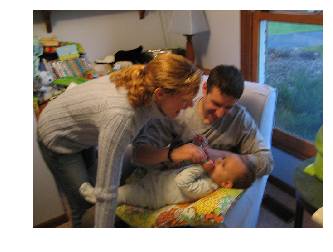

A man and woman leaning over a baby.
A smiling man and woman tending to a small child.
A man and woman are looking at the baby
A man sitting in a chair with an infant laying on his lap and a woman standing over the top and looking down at the infant.
A man sitting in a chair with a baby on his lap while a women is standing over them. 


In [10]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)